In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import yaml

from node import *
from pathlib import Path

In [2]:
ex_yaml = "sample_flock.yaml"

In [3]:
raw_topo = yaml.safe_load(open(ex_yaml, "r"))
raw_topo

{0: {'kind': 'leader',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': [1, 2]},
 1: {'kind': 'aggregator',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': [3, 4, 5]},
 2: {'kind': 'aggregator',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': [6, 7, 8, 9]},
 3: {'kind': 'worker',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': []},
 4: {'kind': 'worker',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': []},
 5: {'kind': 'worker',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': []},
 6: {'kind': 'worker',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': []},
 7: {'kind': 'worker',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': []},
 8: {'kind': 'worker',
  'globus_compute_endpoint': None,
  'proxystore_endpoint': None,
  'children': []},

In [4]:
def yaml_to_nx(yaml_file: Path):
    with open("sample_flock.yaml", "r") as f:
        content = yaml.safe_load(f)
    topo = nx.DiGraph()

    # (1) Add the nodes with their attributes --- ignore children for now.
    required_attrs: set[str] = {
        "kind", "globus_compute_endpoint", "proxystore_endpoint", "children"
    }
    for node_idx, values in content.items():
        for attr in required_attrs:
            if attr not in values:
                raise ValueError(f"Node {node_idx} does not have required attribute: `{attr}`.")

        topo.add_node(
            node_idx,
            kind=FlockNodeKind.from_str(values["kind"]),
            globus_compute_endpoint=values["globus_compute_endpoint"],
            proxystore_endpoint=values["proxystore_endpoint"]
        )
        for extra_attr in set(values) - required_attrs:
            topo.nodes[node_idx][extra_attr] = values[extra_attr]

    # (2) Add the edges from the children attribute.
    for node_idx, values in content.items():
        for child in values["children"]:
            topo.add_edge(node_idx, child)

    return topo

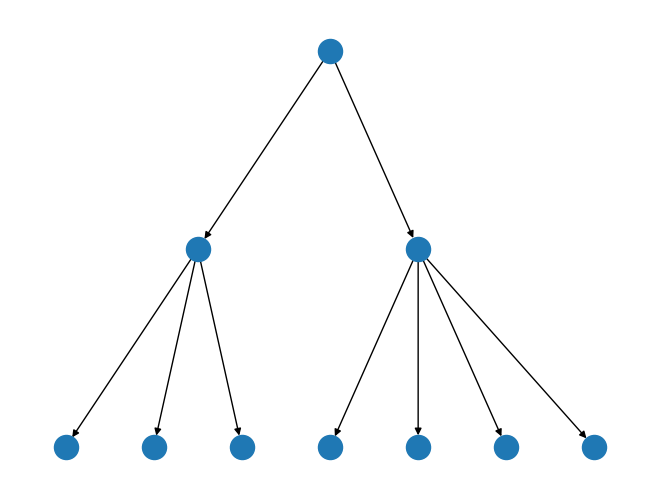

In [5]:
topo = yaml_to_nx(ex_yaml)
pos = nx.nx_agraph.graphviz_layout(topo, prog="dot")
nx.draw(topo, pos)
plt.show()

In [6]:
print(list(topo.successors(1)))

[3, 4, 5]


In [7]:
topo.nodes[5]

{'kind': <FlockNodeKind.WORKER: 3>,
 'globus_compute_endpoint': None,
 'proxystore_endpoint': None}

In [9]:
0 in topo.nodes

True